In [2]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 2a)

Computing the solution to the equation
$$\beta b^3 \frac{db}{dz} = \alpha b^3 - Q$$
which represents the steady state of the equations handled in part 1.

A Forward Euler method is used for the discretisation.

In [6]:
# Functions to solve the equation

# Calculating the b value at z given knowledge of the value at z - dz.
def steady_iteration(Q: float, alpha: float, beta: float, bPrev: float, 
                     dz: float) -> float:
    b = bPrev + dz * (alpha * bPrev**3 - Q) / (beta * bPrev**3)
    return b

# Solves the steady state equation for the range of z from 0 to H
def solve_steady(alpha: float, beta: float, Q: float, H: float, 
                 J: int, b0: float) -> pd.DataFrame:
    """
    Solving the steady state equation using a forward euler method.
    Parameters:
    ----------
    alpha : float
        Parameter alpha in the equation.
    beta : float
        Parameter beta in the equation.
    Q : float
        Parameter Q in the equation.
    H : float
        The height of the domain.
    J : int
        The number of steps in the z direction.
    b0 : float
        The boundary condition at z = 0.
    Returns:
    -------
    pd.DataFrame
        A dataframe with two columns: z and b, where z is the position
        in the domain and b is the corresponding value of b at that position.
    """

    # Initialize the array to store the values of b at each step
    b_values = [b0]
    dz = H / J

    # Iteratively apply the update scheme to compute b at each step
    for j in range(1, J + 1):
        b_next = steady_iteration(alpha, beta, Q, b_values[-1], dz)
        b_values.append(b_next)

    # Create a 2 column table of z againsst b values 
    z_values = [j * dz for j in range(J + 1)]
    result: list[tuple[float, float]] = list(zip(z_values, b_values))
    df = pd.DataFrame(result, columns=["z", "b"])

    return df

In [ ]:
# Defining Parameters

Q = 0.99
alpha = 0.4709
beta = 1 
H = 1
bB = 1.178164343

In [11]:
# Solving the steady state equation for the given parameters
steady_solution: pd.DataFrame = solve_steady(alpha, beta, Q, H, 41, bB)

In [7]:
def dimension_plot(figure, axis, df, label_x, label_y, legend_entry):
    axis.plot(df[label_x], df[label_y], label=legend_entry)
    axis.set_xlabel(label_x)
    axis.set_ylabel(label_y)
    axis.legend()
    figure.tight_layout()
    plt.show()

In [13]:
steady_solution.columns

Index(['z', 'b'], dtype='object')

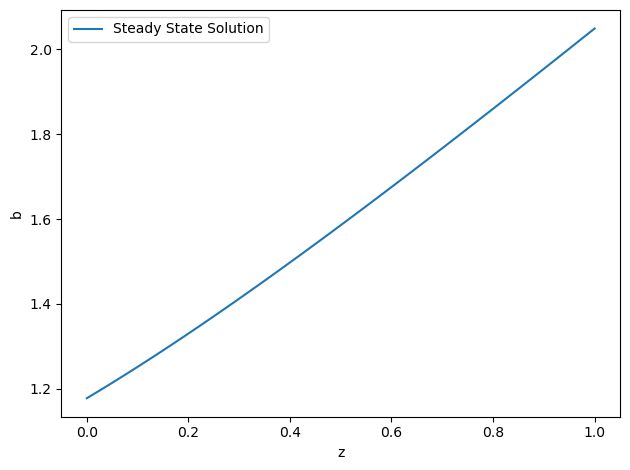

In [14]:
# Plot the dimension plot of the steady solution#
fig, ax = plt.subplots()
dimension_plot(fig, ax, steady_solution, "z", "b", "Steady State Solution")
